# High Frequency Words

### Import Packages

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords

### 1. Choose a corpus of interest.

In [82]:
df = pd.read_csv("mcu.csv").drop(df.columns[0], axis=1)

In [86]:
df['movie'].drop_duplicates()

0                                   Iron Man
687                               Iron Man 2
1677                                    Thor
2520      Captain America: The First Avenger
3194                            The Avengers
4143                              Iron Man 3
5137                    Thor: The Dark World
5845     Captain America: The Winter Soldier
6653                 Avengers: Age of Ultron
7613                                 Ant-Man
8441              Captain America: Civil War
9371          Guardians of the Galaxy Vol. 2
10186                 Spider-Man: Homecoming
11500                         Thor: Ragnarok
12304                          Black Panther
12998                 Avengers: Infinity War
13937                         Captain Marvel
14636                      Avengers: Endgame
Name: movie, dtype: object

In [89]:
capt_america_df = df[df['movie'].str.contains('Captain America')]

In [90]:
capt_america_df['movie'].drop_duplicates()

2520     Captain America: The First Avenger
5845    Captain America: The Winter Soldier
8441             Captain America: Civil War
Name: movie, dtype: object

In [93]:
capt_america_df['line'].head()

2520                    Are you the guys from Washington?
2521                You get many other visitors out here?
2522                      How long have you been on site?
2523    Since this morning. A Russian oil team called ...
2524                   How come nobody spotted it before?
Name: line, dtype: object

In [132]:
corpus_txt = capt_america_df['line'].str.cat(sep=' ')

In [137]:
def custom_tokenize(text):
    # Match words with optional apostrophe contractions, accounting for both straight (') and curly (’)
    pattern = r"\b\w+(?:['’]\w+)?\b|[.,!?;]"
    return re.findall(pattern, text)

tokens = custom_tokenize(corpus_txt)
tokens[:10]

['Are', 'you', 'the', 'guys', 'from', 'Washington', '?', 'You', 'get', 'many']

### 2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).


In [144]:
freq_dist = FreqDist(tokens)
freq_dist

FreqDist({'.': 4026, ',': 1532, 'the': 808, '?': 761, 'I': 733, 'you': 719, 'to': 597, 'a': 554, '!': 390, 'of': 327, ...})

In [160]:
len(freq_dist)

4244

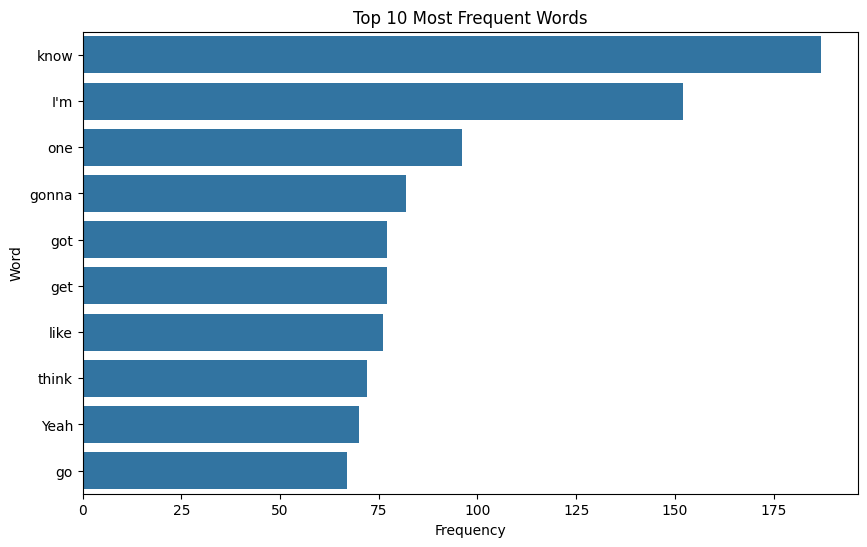

In [162]:
# Convert frequency distribution to a DataFrame
freq_df = pd.DataFrame(freq_dist.items(), columns=['Word', 'Frequency'])

# Sort by frequency
freq_df = freq_df.sort_values(by='Frequency', ascending=False)

# Visualize using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=freq_df.head(10))
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

#### Removing Stopwords

In [145]:
stop_words = set(stopwords.words("english"))

def custom_tokenize(text):
    pattern = r"\b\w+(?:['’]\w+)?\b"
    return [word for word in re.findall(pattern, text) if word.lower() not in stop_words]

tokens = custom_tokenize(corpus_txt)

freq_dist = FreqDist(tokens)
freq_dist

FreqDist({'know': 187, "I'm": 152, 'one': 96, 'gonna': 82, 'get': 77, 'got': 77, 'like': 76, 'think': 72, 'Yeah': 70, 'go': 67, ...})

In [163]:
len(freq_dist)

4244

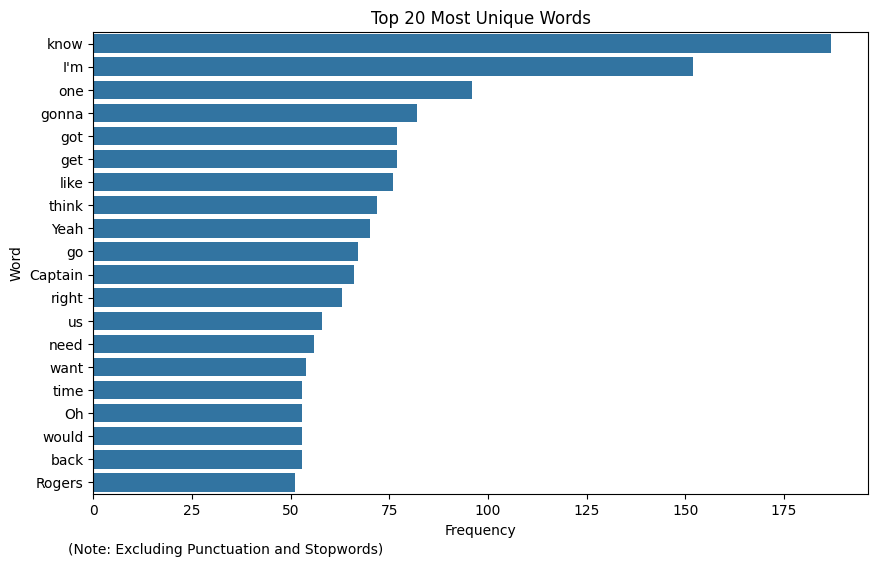

In [158]:
# Convert frequency distribution to a DataFrame
freq_df = pd.DataFrame(freq_dist.items(), columns=['Word', 'Frequency'])

# Sort by frequency
freq_df = freq_df.sort_values(by='Frequency', ascending=False)

# Visualize using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=freq_df.head(10))
plt.title("Top 10 Most Unique Words")
plt.figtext(0.1, 0.01, "(Note: Excluding Punctuation and Stopwords)")
plt.xlabel("Frequency")
plt.show()

### 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

In [180]:
def count_words(text, freq_words):
    
    cumulative_freq = 0
    unique_words_half = list()
    unique_words_count = 0
    total_words = len(text)
    sort_freq_words = freq_words.most_common()

    for word, freq in sort_freq_words:
        cumulative_freq += freq
        unique_words_half.append(word)
        unique_words_count += 1
        
        if cumulative_freq >= total_words / 2:
            break
    return cumulative_freq, unique_words_half, unique_words_count, total_words

sum_freq, freq_words, freq_count, total_words = count_words(corpus_txt, freq_dist)

print(f"There are a total of {total_words:,d} words in our corpus.")
print(f"Half of the total words represented by {freq_count:,d} unique words.")

There are a total of 142,295 in our corpus.
Half of the total words represented by 4,244 unique words.


### 4. Identify the 200 highest frequency words in this corpus.

In [186]:
freq_df.head(200)

,Word,Frequency
30,know,187
1779,I'm,152
44,one,96
42,gonna,82
25,got,77
...,...,...
1251,use,12
408,Maybe,12
611,guess,12
8,morning,12


### 5. Create a graph that shows the relative frequency of these 200 words.

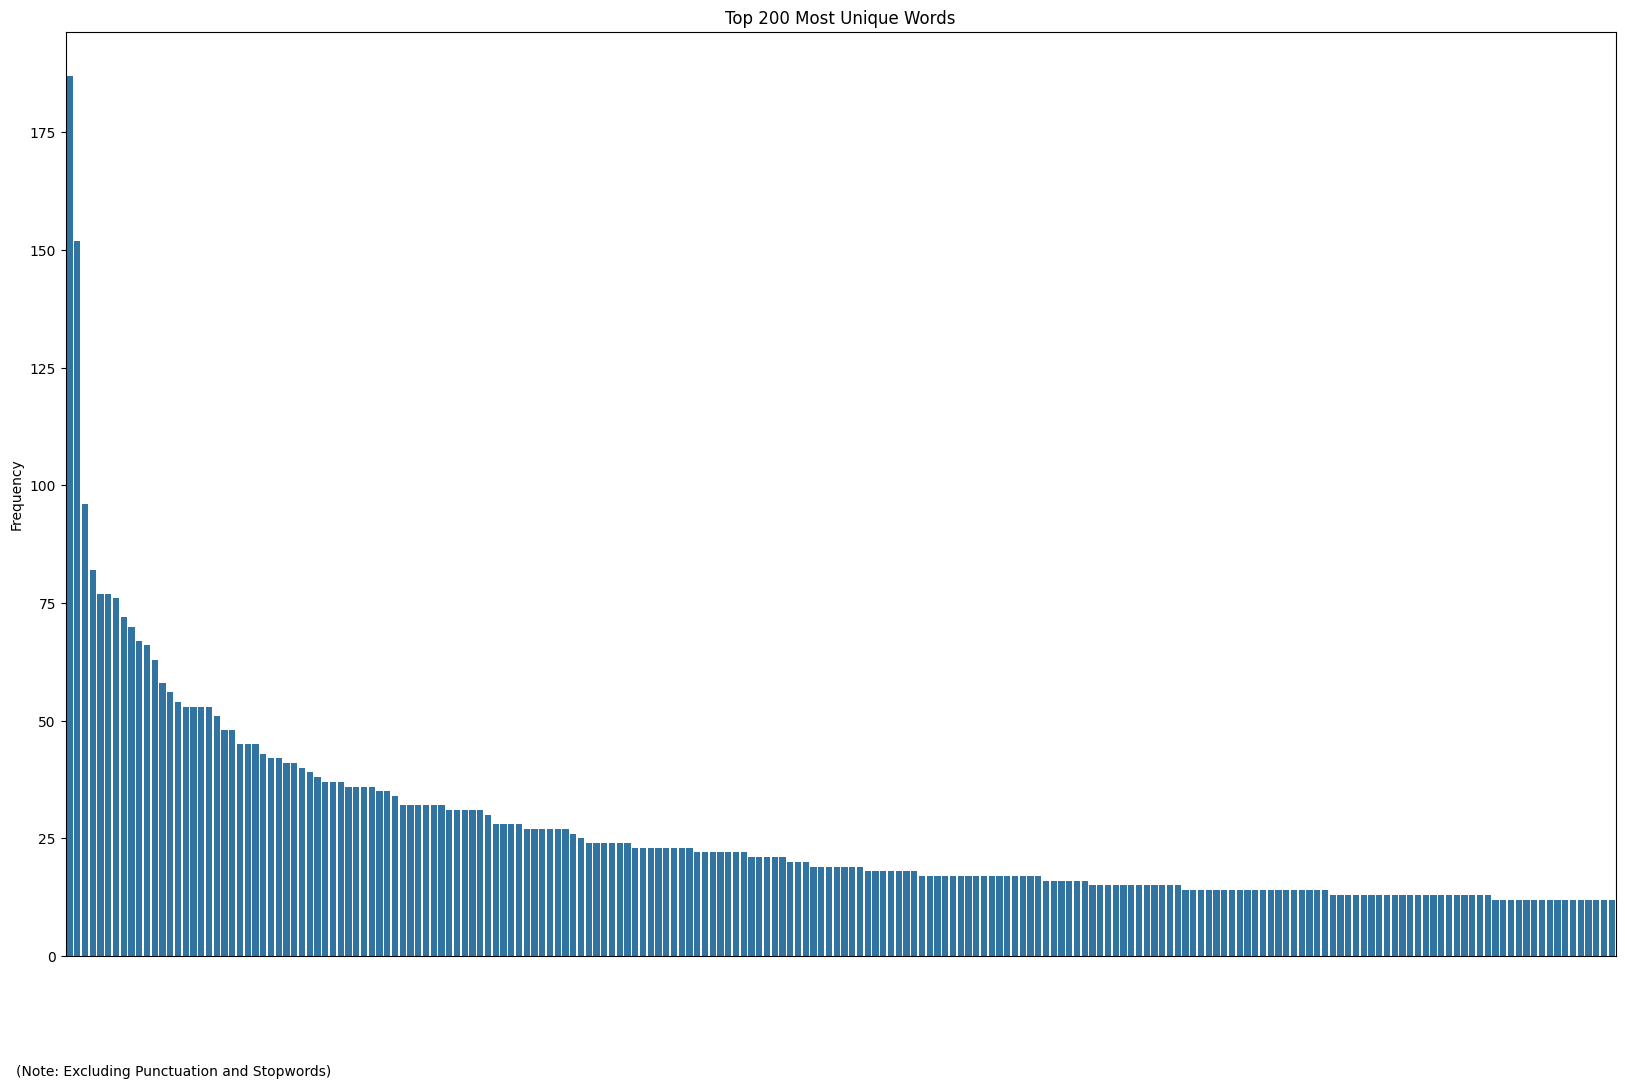

In [193]:
# Convert frequency distribution to a DataFrame
freq_df = pd.DataFrame(freq_dist.items(), columns=['Word', 'Frequency'])

# Sort by frequency
freq_df = freq_df.sort_values(by='Frequency', ascending=False)

# Visualize using Seaborn
plt.figure(figsize=(20, 12))
ax = sns.barplot(x='Word', y='Frequency', data=freq_df.head(200))
plt.title("Top 200 Most Unique Words")
plt.figtext(0.1, 0.01, "(Note: Excluding Punctuation and Stopwords)")
plt.xticks([])
plt.xlabel("")
plt.show()

### 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

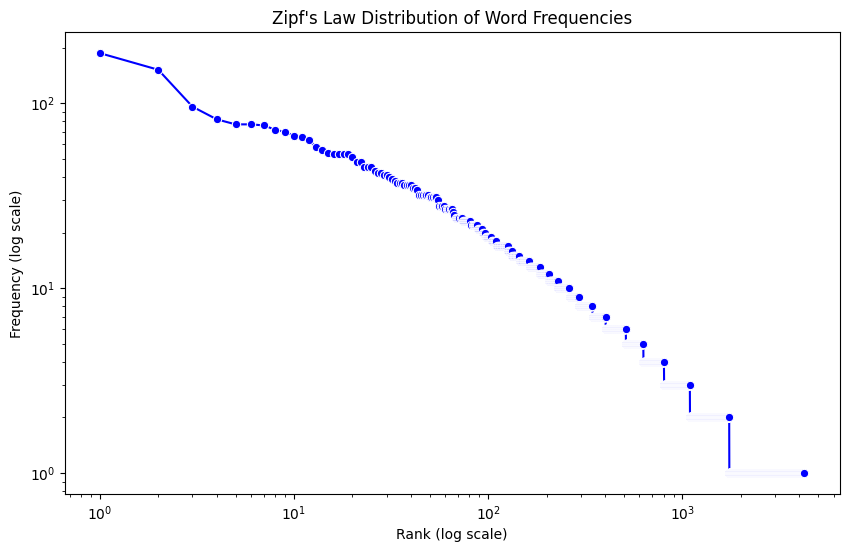

In [194]:
# Rank words by frequency
freq_df['Rank'] = freq_df['Frequency'].rank(method='first', ascending=False)

# Plot Zipf's law curve
plt.figure(figsize=(10, 6))
sns.lineplot(x='Rank', y='Frequency', data=freq_df, marker='o', color='b')
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis
plt.title("Zipf's Law Distribution of Word Frequencies")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.show()


### 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”